# 크롤링

### 인터넷에서 정보 수집 
- SNS , 웹사이트

### 크롤링
- API 기반 정보수집 : 프로그램을 위한 정보 제공  API가 존재
- 스크레이핑  : 인간 사용자를 위해 제공된 웹페이지를 파싱하여 활용

# API 기반 크롤링

## Naver crawling (비 로그인 형)

### 1) 개발자 센터 가입

http://developers.naver.com

- 서비스 API 선택  ->  오픈 api 이용 신청 -> 어플리케이션 등록
    - 검색 API

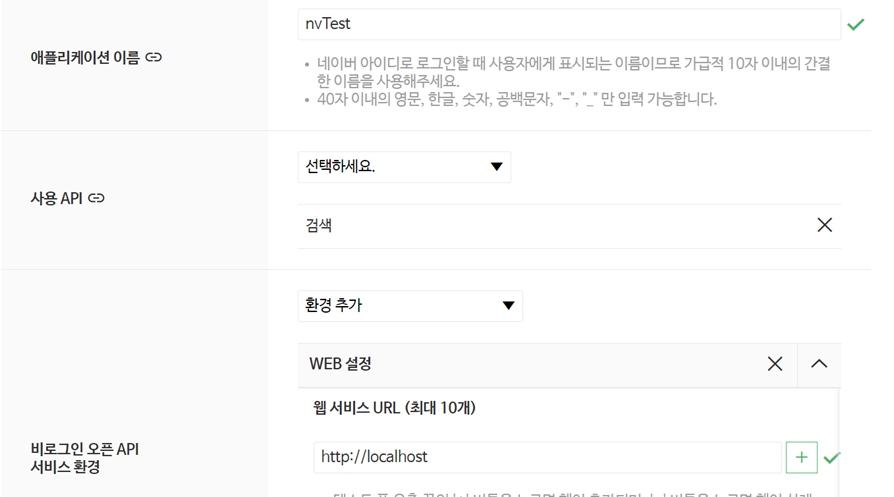
    
<br><br>
- application id와 키 획득
  
  
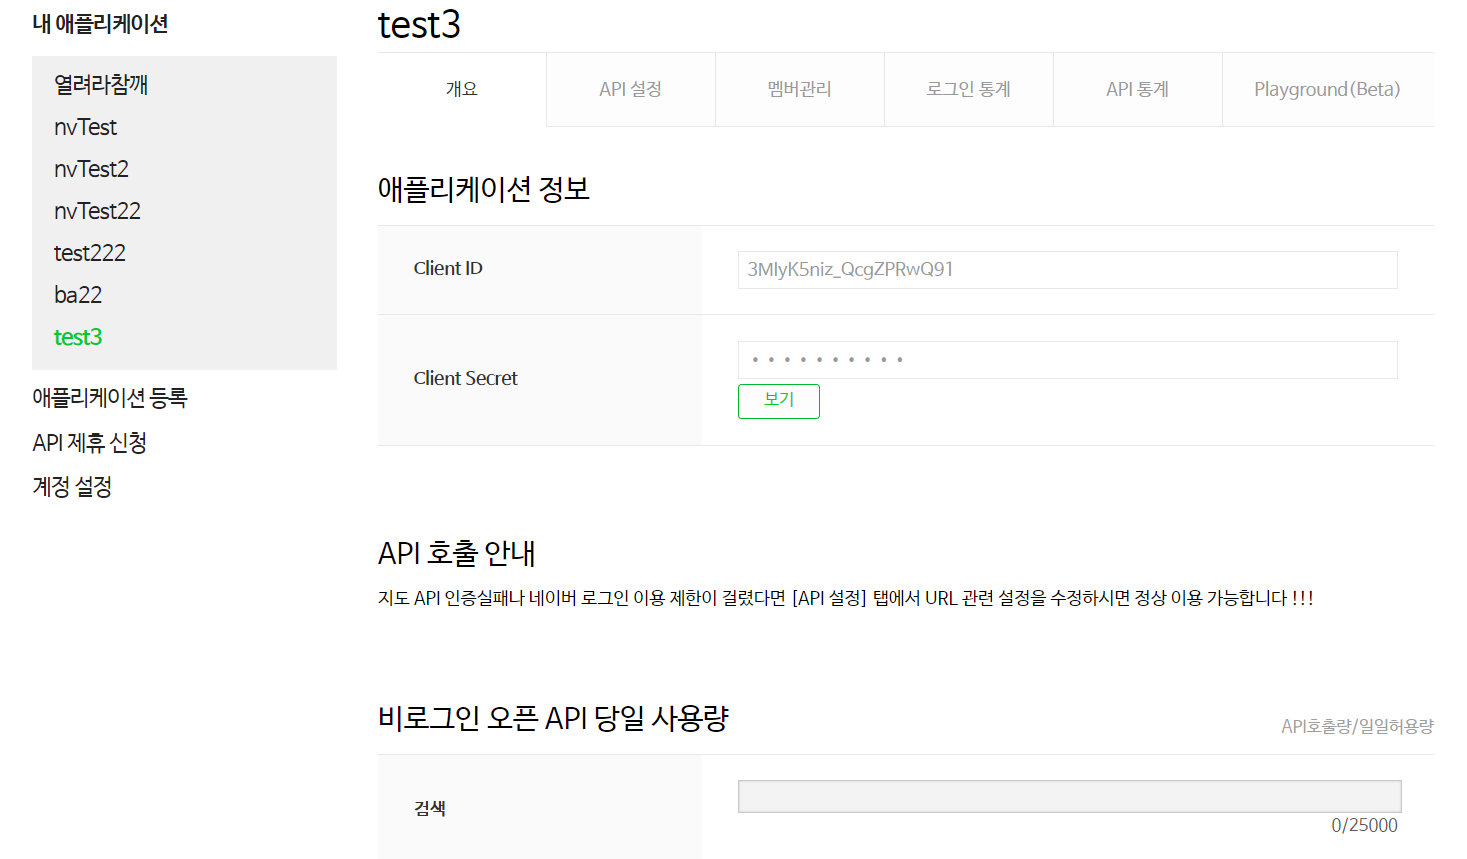


### 2) id와 키 설정



In [2]:
import os
import sys

import datetime
import time
import json

# 반드시 자기 id로 넣기 
client_id = 'NowXJx4J_zVdRZcuTVJt'
client_secret = 'enLGOg5Jpe'

LEC=True

### 3) 네이버 크롤링 프로그램 구조

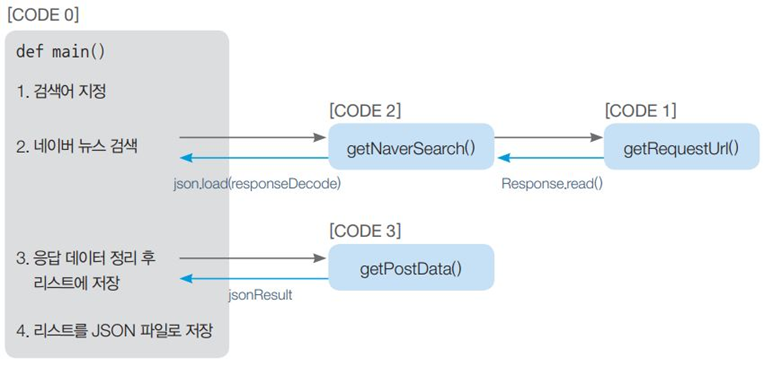


### 4)  urllib  호출 부분

- 헤더에 id, secret 포함하여, api url에 get 방식으로 접근


In [3]:
import urllib.request

def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
        
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

### 5)  url 구성 및 호출

- 전체 목록

https://developers.naver.com/docs/common/openapiguide/apilist.md#%EB%B9%84%EB%A1%9C%EA%B7%B8%EC%9D%B8-%EB%B0%A9%EC%8B%9D-%EC%98%A4%ED%94%88-api  참조

- 뉴스 검색 API
    - 한번에 100개, 최대 1000개  가능

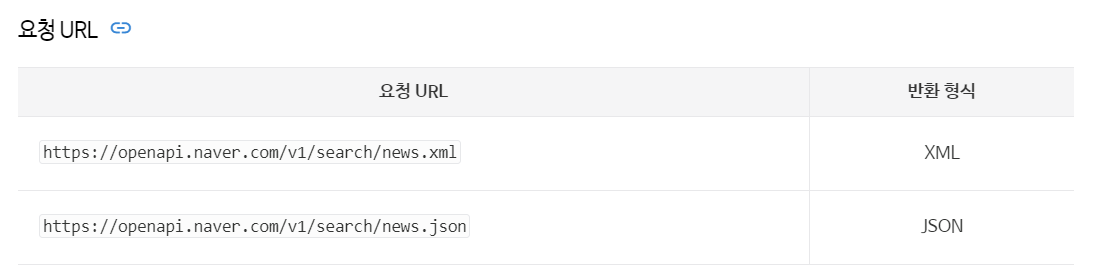

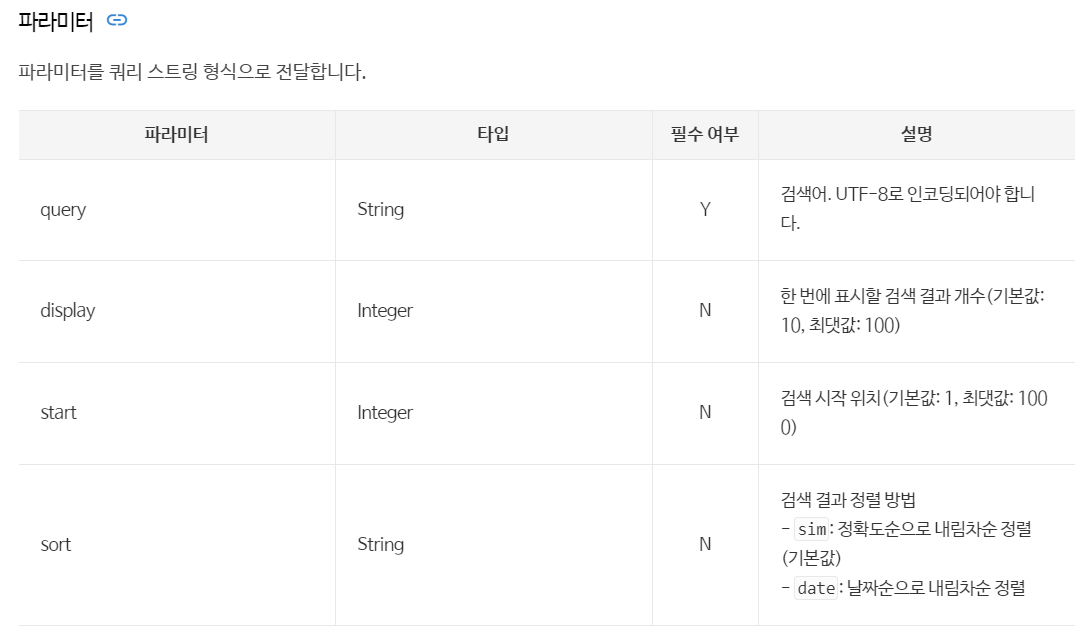

- Test

In [4]:
if LEC:
    q = urllib.parse.quote("챗GPT")  # url coding

    url = "https://openapi.naver.com/v1/search/news.json?query=%s&display=5"%q
    print (url)
    resp = getRequestUrl(url)

    print (resp)

https://openapi.naver.com/v1/search/news.json?query=%EC%B1%97GPT&display=5
[2023-03-22 09:18:33.894398] Url Request Success
{
	"lastBuildDate":"Wed, 22 Mar 2023 09:17:40 +0900",
	"total":17336,
	"start":1,
	"display":5,
	"items":[
		{
			"title":"구글, <b>챗GPT<\/b> 대항마 ‘바드’ 美·英 출시…“점차 더 많은 국가·언어로 확장...",
			"originallink":"http:\/\/www.dt.co.kr\/contents.html?article_no=2023032202109931081001&ref=naver",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/029\/0002790261?sid=105",
			"description":"구글이 <b>챗GPT<\/b>의 대항마로 꼽히는 대화형 AI(인공지능) &apos;바드(Bard·시인)&apos;를 출시했다. 출시를 예고한 지 약 한... MS는 오픈AI에 대한 대규모 투자로 밀월관계를 맺고 오픈AI의 차세대 LLM &apos;GPT-4&apos; 기반 &apos;빙&apos;을 선보이는 등... ",
			"pubDate":"Wed, 22 Mar 2023 09:13:00 +0900"
		},
		{
			"title":"[특징주] 유엔젤, 구글 <b>챗GPT<\/b> 대항마 &apos;바드&apos; 시험판 출시에 강세",
			"originallink":"http:\/\/moneys.mt.co.kr\/news\/mwView.php?no=2023032209100214314",
			"link":"https:\/\/n.news.naver.com\/mnews\/article\/417\/0000905738?sid=101",
			"description":"구


- URL 구성 하여 getRequestUrl()호출
- string인 json 결과를 json 객체로 loading하여 return

In [20]:
def getNaverSearch(svc, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    svc = "/%s.json" % svc
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + svc + parameters    
    responseDecode = getRequestUrl(url)   
    
    if (responseDecode == None):
        return None
    else:
        # print(json.loads(responseDecode))
        return json.loads(responseDecode) # json decode

- Test

In [10]:
if LEC :
    result = getNaverSearch("news", "챗GPT", 10, 2)
    print(result) 

[2023-03-22 09:23:22.457873] Url Request Success
{'lastBuildDate': 'Wed, 22 Mar 2023 09:22:44 +0900', 'total': 17337, 'start': 10, 'display': 2, 'items': [{'title': 'KB증권 “LG전자, 1분기 어닝서프라이즈...목표가 16만원으로 상향”', 'originallink': 'https://biz.chosun.com/stock/market_trend/2023/03/22/GRTSLVIBVFCEJCX7QEB6FGWLOQ/?utm_source=naver&utm_medium=original&utm_campaign=biz', 'link': 'https://n.news.naver.com/mnews/article/366/0000886904?sid=101', 'description': '“<b>챗GPT</b> 한계 극복한 ‘AI 엑사원’ 활용, 가전 점유율 확대 시너지” KB증권은 22일 LG전자에 대해 1분기... <b>챗GPT</b> 한계를 극복한 LG 초거대 인공지능(AI)인 엑사원(EXAONE)을 활용해 향후 로봇, 스마트공장, B2B 가전... ', 'pubDate': 'Wed, 22 Mar 2023 08:52:00 +0900'}, {'title': '<b>챗GPT</b> 등장 이후 전 세계 인공지능 서비스 열풍… AI 전문 스타트업 주목', 'originallink': 'https://platum.kr/archives/203921', 'link': 'https://platum.kr/archives/203921', 'description': '2022년 12월 1일, 오픈AI의 <b>챗GPT</b>가 세상에 등장한 이후 전 세계 대화형 AI 시장이 들썩이기 시작했다. AI시장에 새로운 바람을 일으킨 <b>챗GPT</b>를 빠르게 도입한 기업들이 속속 등장하면서 국내에도 <b>챗GPT</b>를 활용해 서비스를... ', 'pubDate': '

### 7) 결과 가공

- json 구조로 부터 필요한 필드만 추출, 필요한 형태 변환 => list로 return 

In [14]:
def getPostData(resultJ, resultL):   
    for item in resultJ['items'] :

        #변환
        pDate = datetime.datetime.strptime(item['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
        pDate = pDate.strftime('%Y-%m-%d')

        #필드 추출 
        resultL.append([item['title'], item['description'], item['originallink'], pDate])
    print(len(resultL))

In [15]:
if LEC:
    resultL = []
    resultJ = getNaverSearch("news", "인공지능", 1, 6)
    getPostData(resultJ, resultL)
    print(resultL)

[2023-03-22 09:28:00.238402] Url Request Success
6
[['AI로 학생 지식수준 파악하고 맞춤 콘텐츠… 2025년 ‘수학·영어·정보’ 우...', '■ 파워인터뷰 - AI 디지털 교과서는… 수학엔 ‘<b>지능</b>형 튜더링’ 기능 영어는 ‘음성인식’ 적극 활용 코딩교육 체험·실습도 강화 디지털 대전환 시대에 대응해 교육부는 2025년 <b>인공지능</b>(AI) 디지털 교과서... ', 'https://www.munhwa.com/news/view.html?no=2023032201032021022001', '2023-03-22'], ['KT-아마노코리아, AI 활용 &apos;스마트 주차&apos; 솔루션 개발', '스마트 주차는 <b>인공지능</b>(AI). 빅데이터, 클라우드 등 IT 기술을 차량과 주차장에 접목해 주차 효율을 높이고 결제 등 사용자 편의성을 제고하는 솔루션을 말한다. 이번 업무협약을 통해 KT는 AI 스페이스(Space) 사업과 통신... ', 'http://www.edaily.co.kr/news/newspath.asp?newsid=01656406635545944', '2023-03-22'], ['“3조 지원하는 ‘글로컬 대학’ 기획안 전부 공개… 지금이 개혁 골든타임”...', '쇠락하는 지역을 지방 대학이 중심이 돼 되살리는 ‘글로컬(Glocal·global+local) 대학’, <b>인공지능</b>(AI) 교과서 도입, 통합형 첨단 인재 육성, 교육감 직선제 폐지 등 이 장관이 취임 후 밝힌 교육정책은 그 누구도 가본 적이... ', 'https://www.munhwa.com/news/view.html?no=2023032201031921022001', '2023-03-22'], ['&apos;주차 도우미&apos; AI 나온다...KT, 스마트 주차 사업 강화', '스마트 주차란 <b>인공지능</b>(AI), 빅데이터, 클라우드 등 IT 기술을 차량과 주차장에 접목해 주차 효율을 높이고 결제 등 

- 전체 프로그램

In [21]:
def main():
    svc = 'news'   # 크롤링 할 대상  : news, blog, encyc, shop
    srcText = input('검색어를 입력하세요: ')
    resultL = []
    start = 1
     
    while True:         
        jsonResponse = getNaverSearch(svc, srcText, start, 100)        
        if jsonResponse == None:
            break
        getPostData(jsonResponse, resultL)
        start+=100
        if (start > 1000) :
            break

    print("가져온 데이터 : %d 건" %len(resultL))
    
if __name__ == '__main__':
    main()

검색어를 입력하세요: 한국
[2023-03-22 09:34:52.933856] Url Request Success
100
[2023-03-22 09:34:53.250887] Url Request Success
200
[2023-03-22 09:34:53.650516] Url Request Success
300
[2023-03-22 09:34:53.954938] Url Request Success
400
[2023-03-22 09:34:54.361681] Url Request Success
500
[2023-03-22 09:34:54.774569] Url Request Success
600
[2023-03-22 09:34:55.181009] Url Request Success
700
[2023-03-22 09:34:55.591765] Url Request Success
800
[2023-03-22 09:34:56.002215] Url Request Success
900
[2023-03-22 09:34:56.410790] Url Request Success
1000
가져온 데이터 : 1000 건


### 과제1 : 블로그 검색, "빅데이터", 정확도 순, 1~110번 제목만 출력 

In [24]:
result1 = getNaverSearch('blog', '빅데이터', 1, 100)
result2 = getNaverSearch('blog', '빅데이터', 101, 10)

for item in result1['items'] :
    print(item['title'])

for item in result2['items'] :
    print(item['title'])

[2023-03-22 09:53:58.947196] Url Request Success
[2023-03-22 09:53:59.034409] Url Request Success
<b>빅데이터</b>학원 취업을 위한 공부과정
<b>빅데이터</b>분석기사 응시자격 학점은행제로 맞추고 학사학위까지... 
<b>빅데이터</b>자격증 한직평 온라인 교육으로 기본학습 완료
<b>빅데이터</b>전문가 자격증 안전한 획득 방법
<b>빅데이터</b>전문가 자격증 안전한 공부 방법
<b>빅데이터</b>전문가 자격증 도전 학습 전략
<b>빅데이터</b>학원 정답은 이 곳
<b>빅데이터</b>전문가 자격증 시험 준비 과정
<b>빅데이터</b>분석 기초(3) - 정규화/표준화
<b>빅데이터</b>학원 취업 하기 위해 배워야 할 기술
<b>빅데이터</b>분석가 개발 분야로 도전!
<b>빅데이터</b>전문가 자격증 단기 공부 방법
<b>빅데이터</b>국비지원, 개발 경험을 갖출 수 있는 곳!
<b>빅데이터</b>분석기사 손쉽게 취득해요
<b>빅데이터</b> 농업 혁명 주도하며 유니콘 등극
<b>빅데이터</b>학원 취업까지 성공적으로
[aSSIST Together] 마케터의 AI<b>빅데이터</b> 도전기 #1- Why EMBA?
부산코딩학원 파이썬 기반의 <b>빅데이터</b> 분석과정
재직자내일배움카드 국비지원신청, <b>빅데이터</b> 분석기사 취득!
<b>빅데이터</b>학과 대학부터 취업까지 확실하게
코딩학원 <b>빅데이터</b> 기초부터 배우기(파이썬 사용)
<b>빅데이터</b>분석기사 자격증 체계적인 학습 전략
<b>빅데이터</b>학원 기초부터 단계적으로
<b>빅데이터</b>전문가 자격증 정보 및 패스 비법
<b>빅데이터</b>학원 파이썬과 R에 대해서 배워보다
<b>빅데이터</b> 분석을 통한 설계와 최적화 MPM 프로세스 마이닝... 
<b>빅데이터</b> 준전문가 자격증 시험 대비하기
[IT이야기]<b>빅데이터</b>의 정의 및 특징과 활용 사례
한국교육검정원 <b>빅데이터<



# Facebook API 활용 (로그인 형)

## OAuth 

특정 사용자의 동의를 얻어 사용자의 정보를 가져오는데 API에서 사용자 인증 후 동의를 얻는데 사용

- 기본 구조

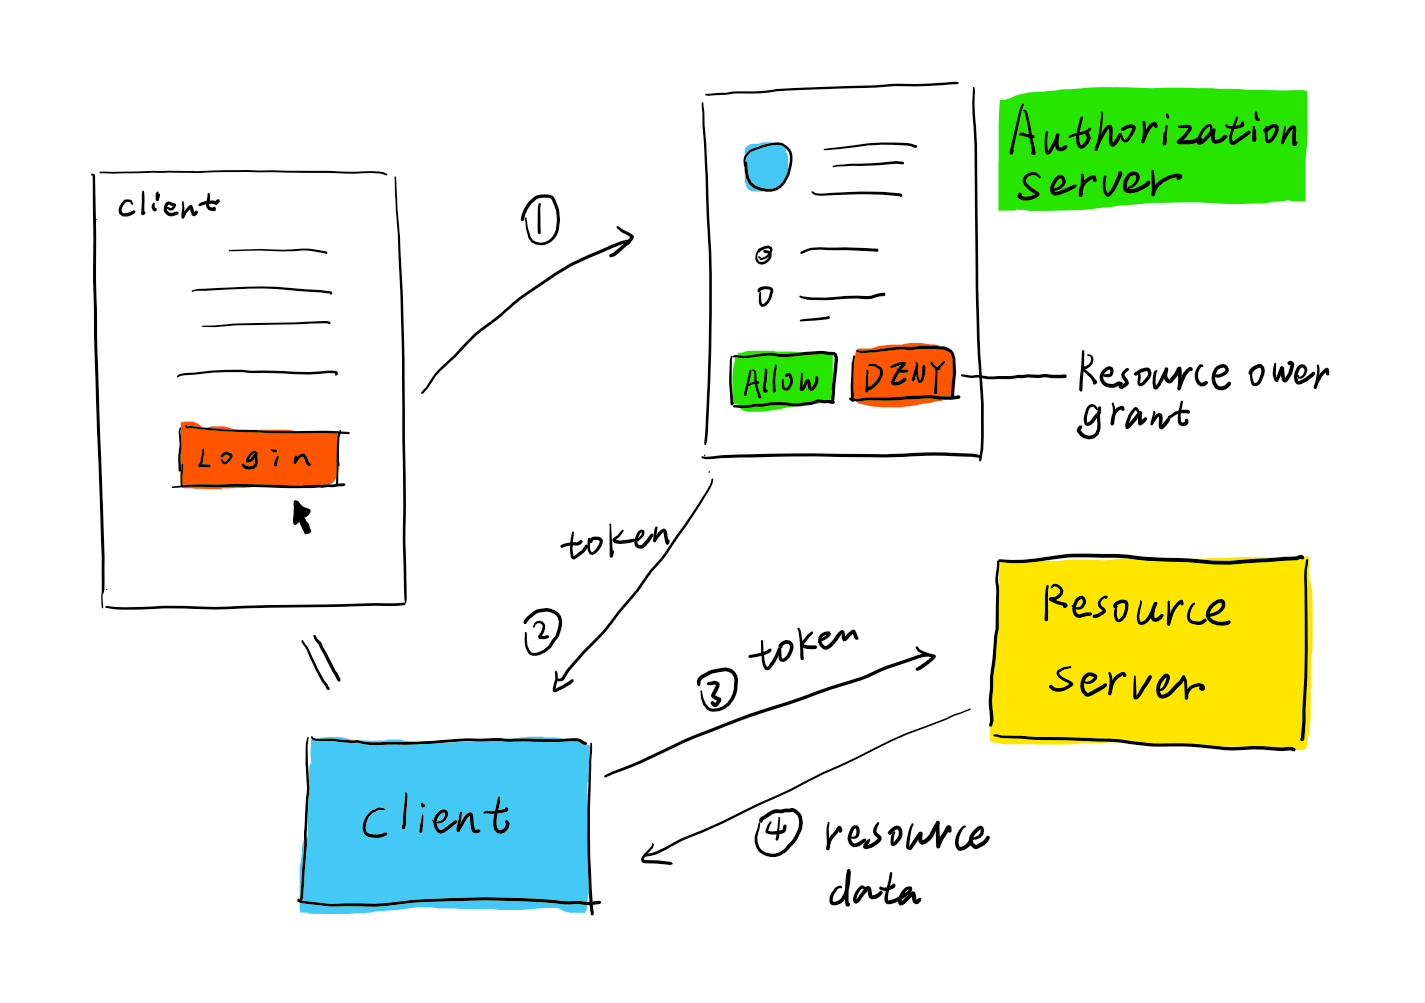


- 개발 흐름 : user token (동의) 확보 -> api에 user token 포함하여 호출

## 페이스북 OAuth 활용

### 1) Meta 개발자 등록, app 등록

- facebook 계정 필요
- https://developers.facebook.com/apps/create

<br>
- 앱만들기 -> 앱유형 : 비즈니스   -> 기본정보제공

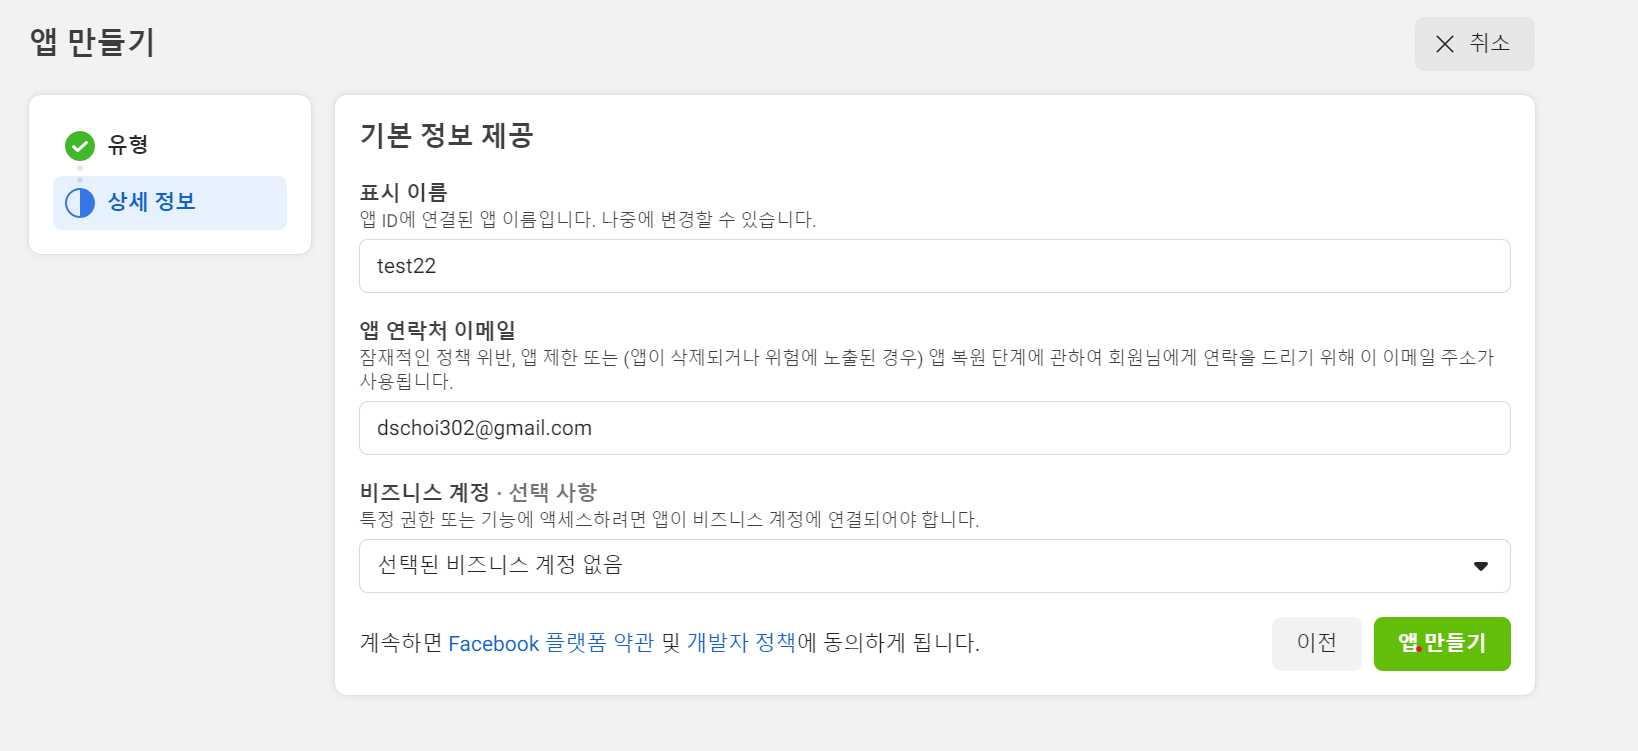

- 앱목록 : 테스트앱 만들기, 모든 권한 테스트 가능 ( 테스트앱이 아닌 경우, 검수를 받아야만 함)

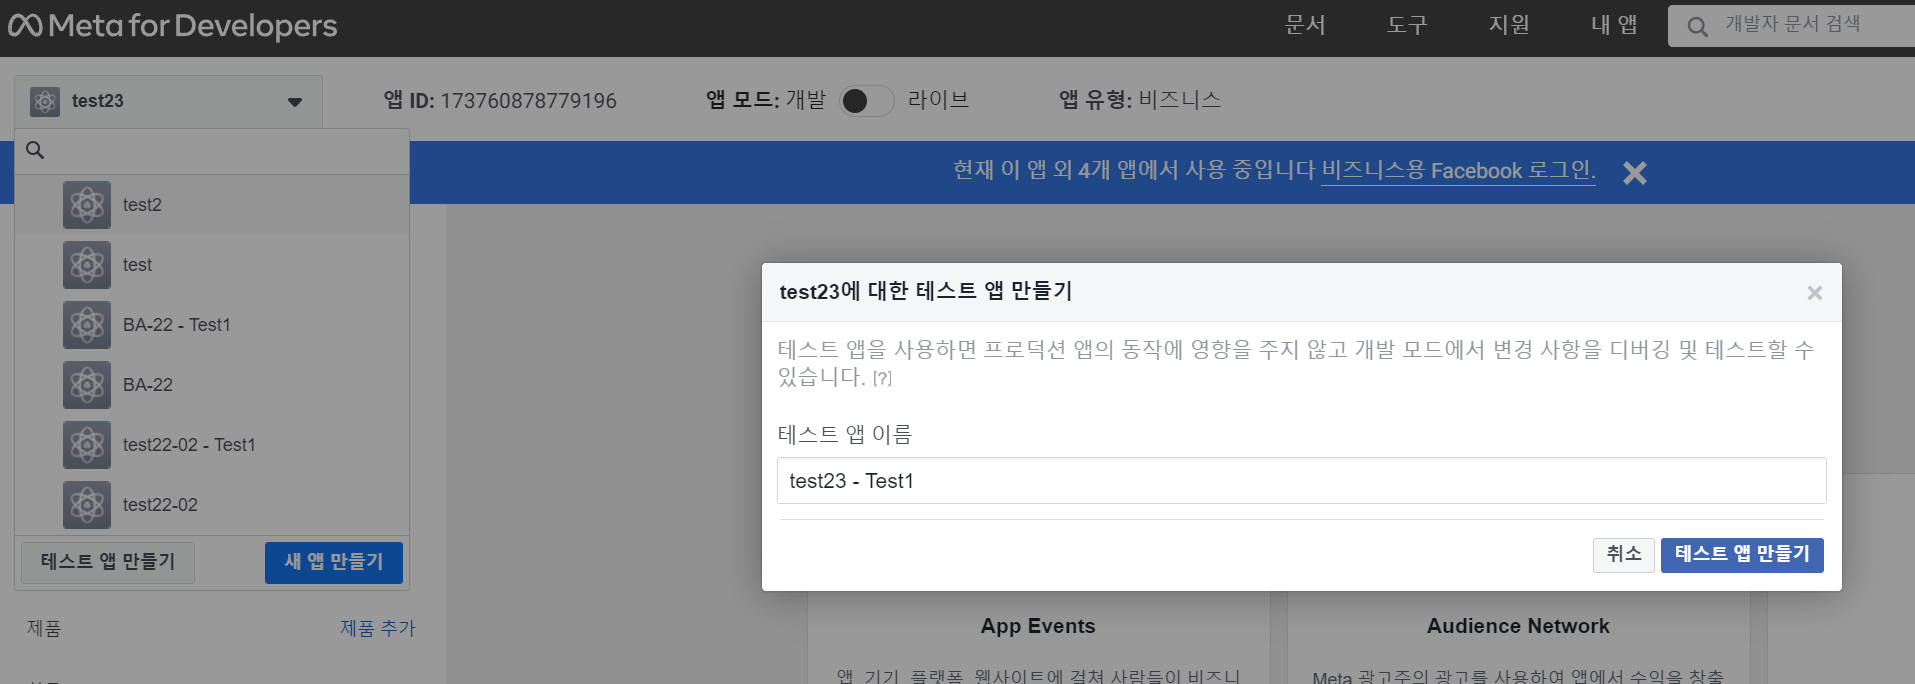

### 2) API 테스트  : API 탐색기


- 메뉴-도구-그래프 API 탐색기
- 권한 추가 : 추가 


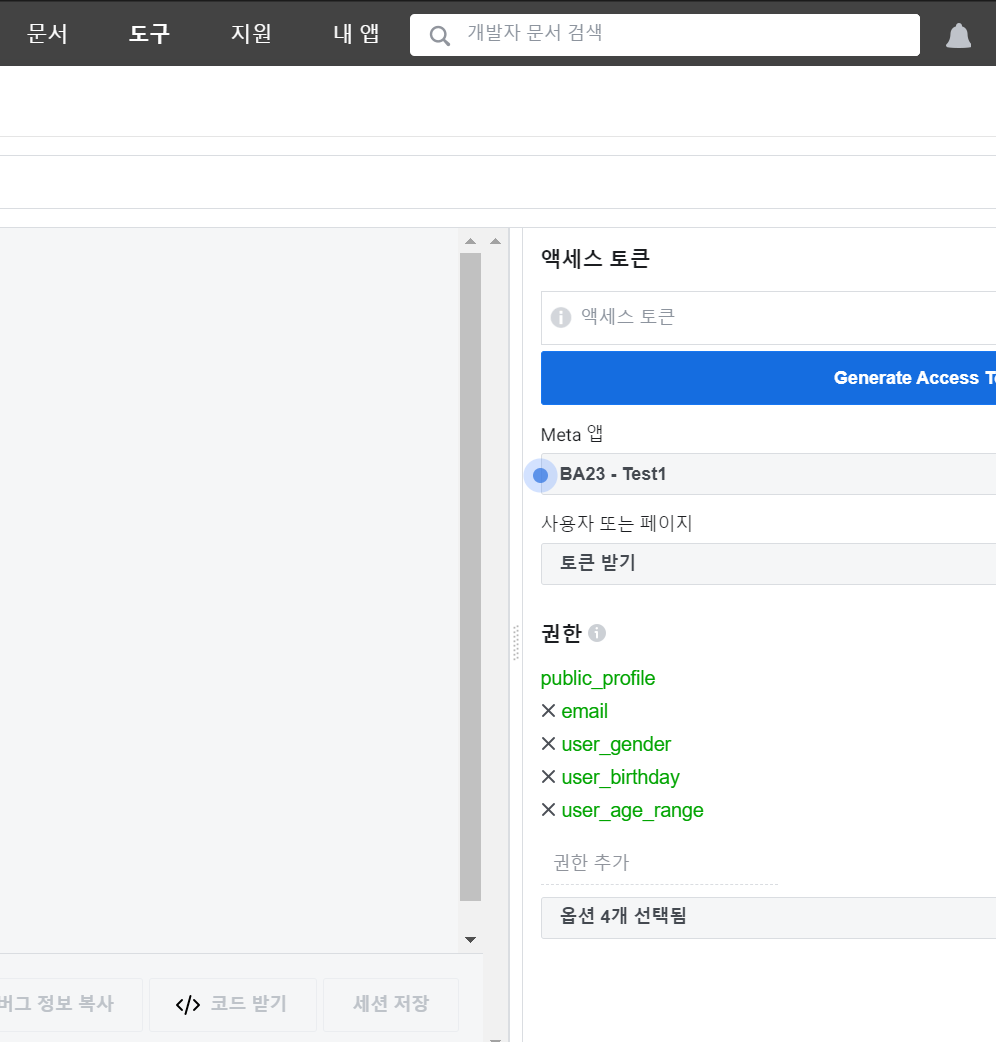

- Generate Access Token 실행 : 본인을 대상 사용자로서 토큰 받기

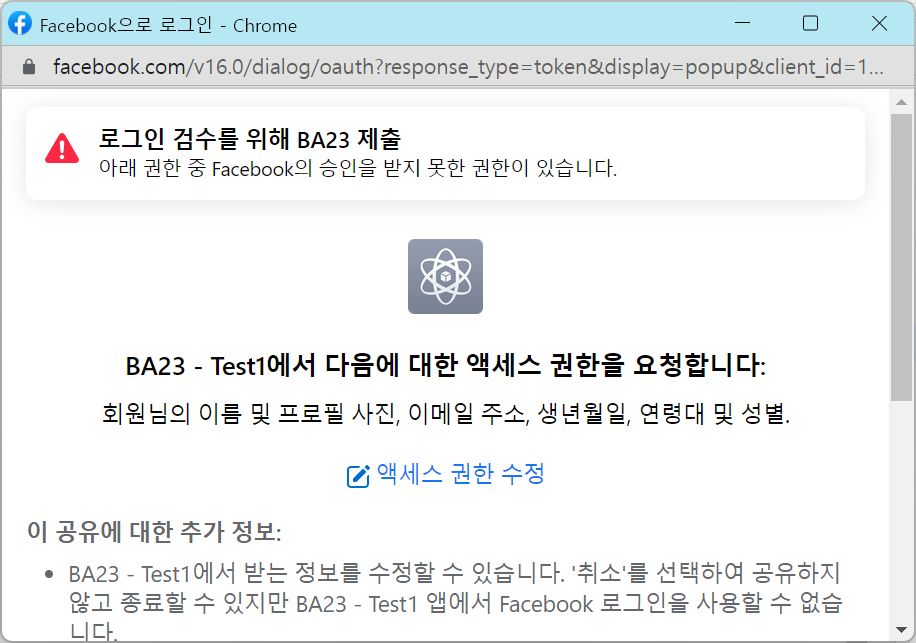

- API 테스트 결과

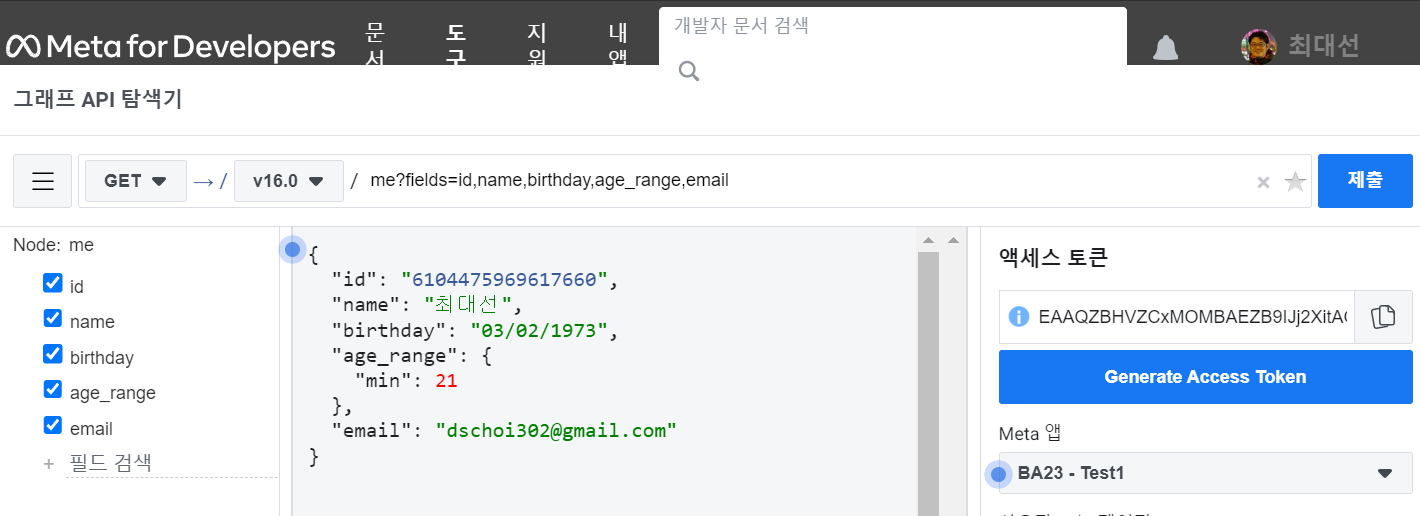


### 3) 타 사용자 정보 조회

- 테스트 사용자

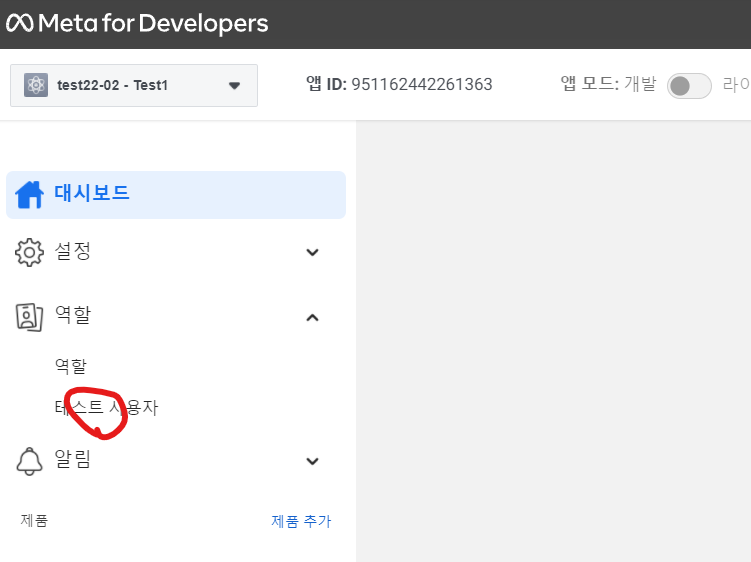

- 액세스 토큰 및 권한
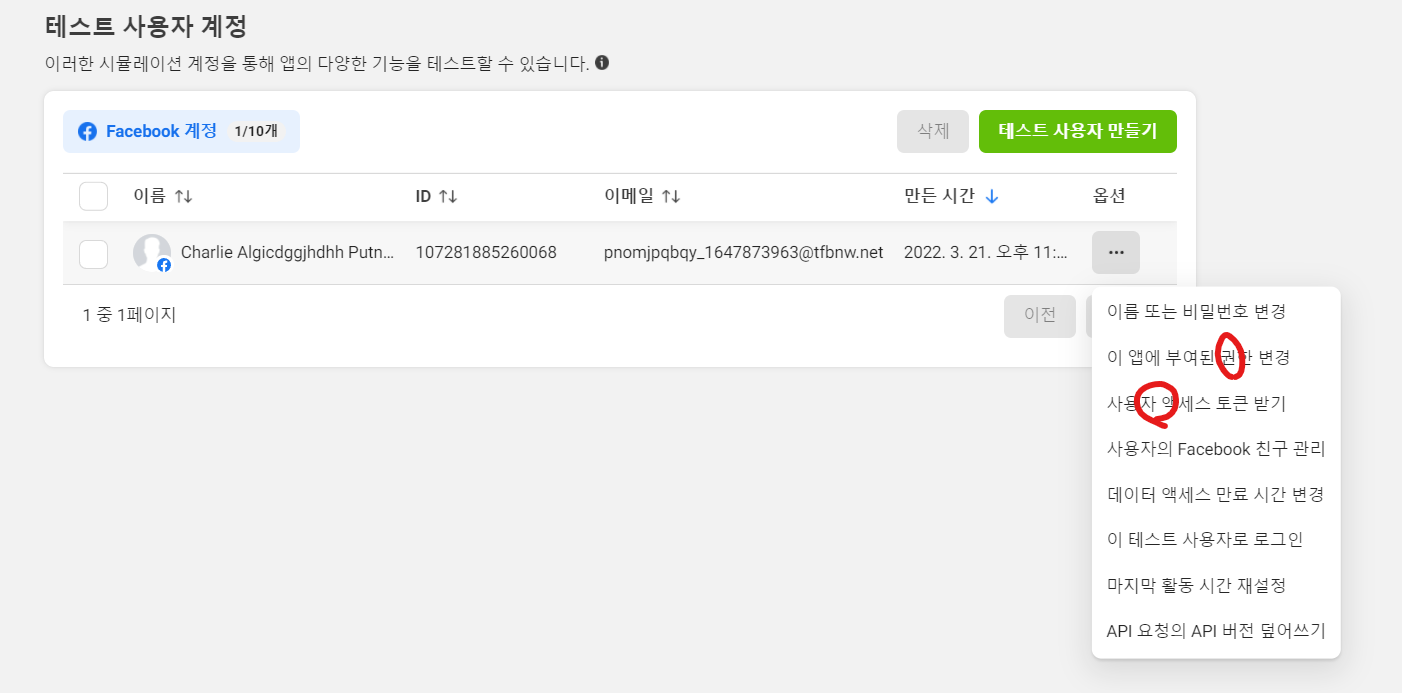

### 4) Access token 확장 
- 만료일 연장 or 재발급 받기 

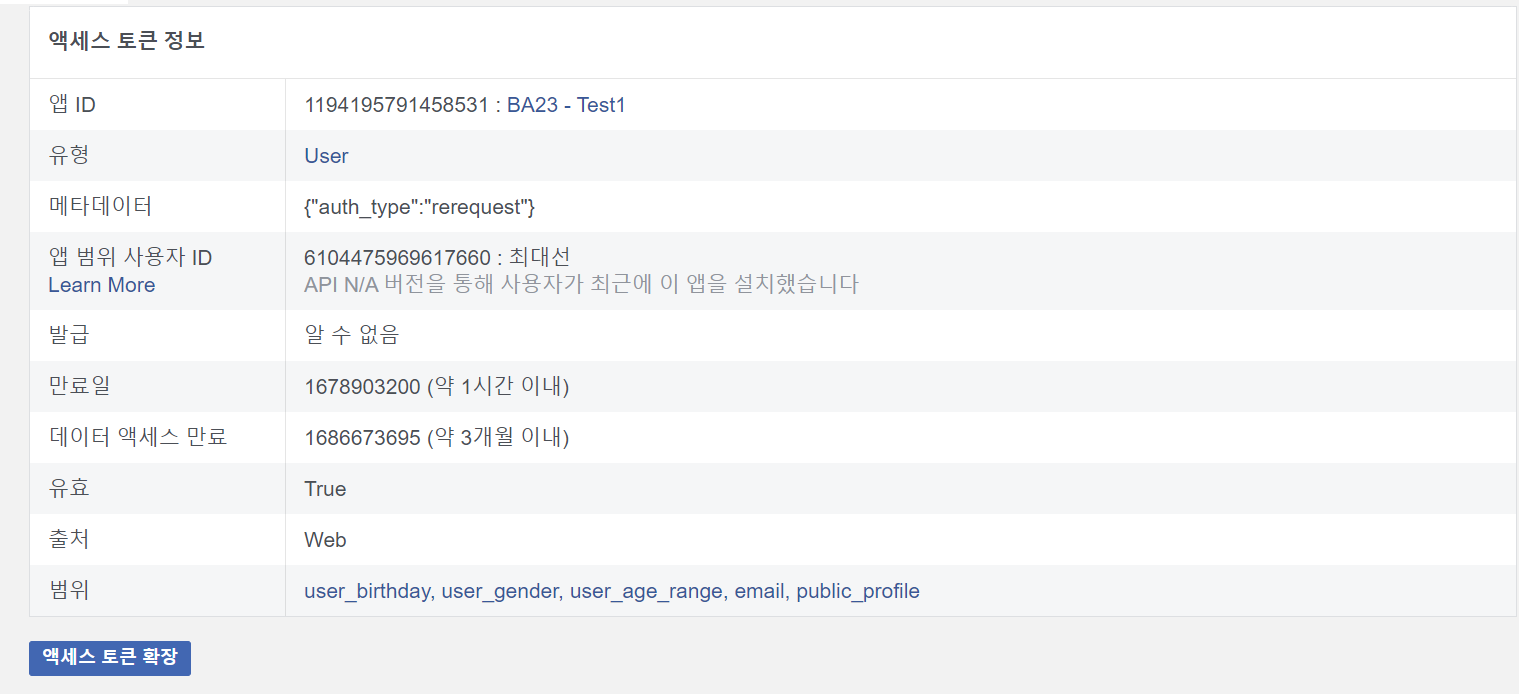



### 5) Python API
- facebook sdk 설치



In [25]:
!pip install facebook-sdk

### 6) api  활용 python code 

- 참조 문서 : 

https://developers.facebook.com/docs/graph-api

https://facebook-sdk.readthedocs.io/en/latest/api.html


### api code test


In [45]:
import urllib3
import facebook
import requests

token='EAABqYZAdpFsYBAOnHm91gu9RvPomiI4ZBMiNOrYmig7vcEKpZC9KPdLzm3xARJ2Kd2qwqzgKecNJVyZB2NRgFARZBggcb0HVONXshpKgPxq8wL24XEd15ZA9BJwnb2FAkbBvkypR67YI4QeKfIyBN7MSyq6nkZBIrZBv6sJntphWuUgq5HcidW1adsaCr2ZACBcpvuyMivqJyObk0xGu0ZAmdZCJFXT059r4GDG2e2yMzvUMrBA7Re0QplY'
graph = facebook.GraphAPI(access_token = token)
profile = graph.request('/1884110478617991?fields=id,name,email')

print (profile)

GraphAPIError: Error validating access token: Session has expired on Tuesday, 21-Mar-23 20:00:00 PDT. The current time is Tuesday, 21-Mar-23 22:19:46 PDT.

## 과제2 : api 코드로 자신의 이름,  email  출력하기
- 과제 평가를 위해 토큰 만료일을 2개월 뒤로 연장하기 

In [44]:
token='EAABqYZAdpFsYBAMtcasw1ge3CUar43vVnmvc0d5ERQttWyADus4CexzaHGSLJf7KjsiWhVvV87Rmkr1hgO8i4iXXNJIySm7DbIXfQ5uUztmyDhIwuZAuNDKGug375iWsEIhvX15jdXFZBWEH9Wv25tWlCF4FNb9un3U9cKcGbwq1qZASj9Sh'
graph = facebook.GraphAPI(access_token = token)
profile = graph.request('/1884110478617991?fields=id,name,email')

print (profile)

{'id': '1884110478617991', 'name': '손시연', 'email': 'siyeon0209@naver.com'}
